# Titanic Survival Prediction - Beginner Friendly

A simple classification project to predict passenger survival using a built-in dataset.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


## Step 2: Load the Dataset

We'll use the Titanic dataset from seaborn (built-in, no download needed!)

In [2]:
# Load Titanic dataset (built-in with seaborn)
data = sns.load_dataset('titanic')

print(f"Dataset size: {data.shape[0]} passengers, {data.shape[1]} columns")
print(f"\nFirst 5 rows:")
data.head()

Dataset size: 891 passengers, 15 columns

First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Step 3: Explore the Data

In [3]:
# Basic information
print("Dataset Information:")
data.info()

print("\nBasic Statistics:")
data.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Basic Statistics:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survival Rate:
survived
0    549
1    342
Name: count, dtype: int64

Survival percentage: 38.38%


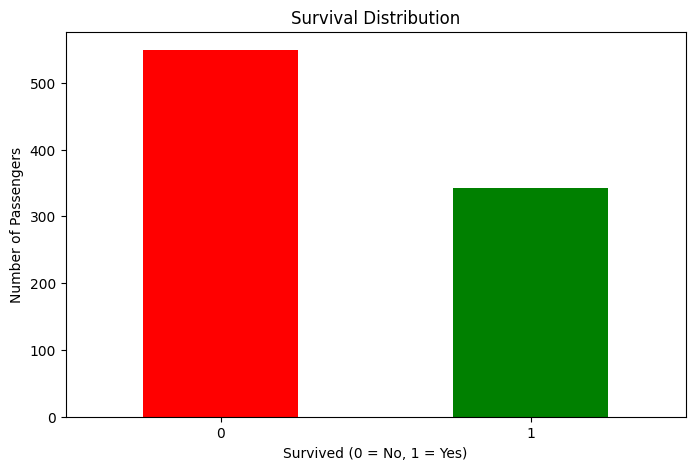

In [4]:
# Check survival rate
print("Survival Rate:")
print(data['survived'].value_counts())
print(f"\nSurvival percentage: {data['survived'].mean()*100:.2f}%")

# Visualize survival
plt.figure(figsize=(8, 5))
data['survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.title('Survival Distribution')
plt.xticks(rotation=0)
plt.show()

In [5]:
# Check for missing values
print("Missing Values:")
missing = data.isnull().sum()
print(missing[missing > 0])

Missing Values:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


## Step 4: Data Preprocessing

In [6]:
# Select important features (keep it simple)
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
target = 'survived'

# Create a clean dataset
df = data[features + [target]].copy()

# Fill missing age with median
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing fare with median
df['fare'].fillna(df['fare'].median(), inplace=True)

# Convert sex to numbers (male=1, female=0)
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Drop any remaining missing values
df.dropna(inplace=True)

print(f"Clean dataset size: {df.shape[0]} passengers")
print(f"\nNo missing values: {df.isnull().sum().sum() == 0}")
df.head()

Clean dataset size: 891 passengers

No missing values: True


C:\Users\dream\AppData\Local\Temp\ipykernel_17716\2928307935.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\dream\AppData\Local\Temp\ipykernel_17716\2928307935.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

,pclass,sex,age,sibsp,parch,fare,survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


## Step 5: Prepare Data for Training

In [7]:
# Separate features (X) and target (y)
X = df.drop('survived', axis=1)
y = df['survived']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} passengers")
print(f"Testing set: {X_test.shape[0]} passengers")

Training set: 712 passengers
Testing set: 179 passengers


## Step 6: Train Models

In [8]:
# Model 1: Logistic Regression (Simple)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

print("✓ Logistic Regression model trained")

✓ Logistic Regression model trained


In [9]:
# Model 2: Random Forest (More Advanced)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✓ Random Forest model trained")

✓ Random Forest model trained


## Step 7: Make Predictions

In [10]:
# Make predictions on test set
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

print("Predictions made successfully!")

Predictions made successfully!


## Step 8: Evaluate Models

In [ ]:
# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Model Performance:\n")
print(f"Logistic Regression:")
print(f"  - Accuracy: {lr_accuracy*100:.2f}%")
print()
print(f"Random Forest:")
print(f"  - Accuracy: {rf_accuracy*100:.2f}%")
print()
print(f"Best Model: {'Random Forest' if rf_accuracy > lr_accuracy else 'Logistic Regression'}")

Model Performance:

Logistic Regression:
  - Accuracy: 81.01%

Random Forest:
  - Accuracy: 79.89%

🏆 Best Model: Logistic Regression


In [12]:
# Detailed classification report for best model
best_model = 'Random Forest' if rf_accuracy > lr_accuracy else 'Logistic Regression'
best_predictions = rf_predictions if rf_accuracy > lr_accuracy else lr_predictions

print(f"\n{best_model} - Detailed Report:")
print(classification_report(y_test, best_predictions, target_names=['Did not survive', 'Survived']))


Logistic Regression - Detailed Report:
                 precision    recall  f1-score   support

Did not survive       0.81      0.88      0.84       105
       Survived       0.80      0.72      0.76        74

       accuracy                           0.81       179
      macro avg       0.81      0.80      0.80       179
   weighted avg       0.81      0.81      0.81       179



## Step 9: Visualize Results

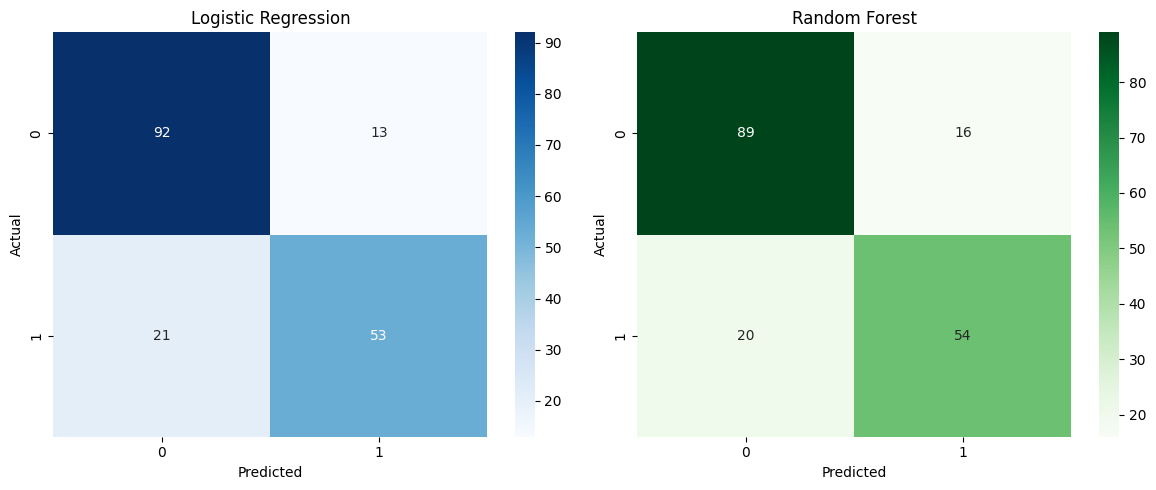

In [13]:
# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

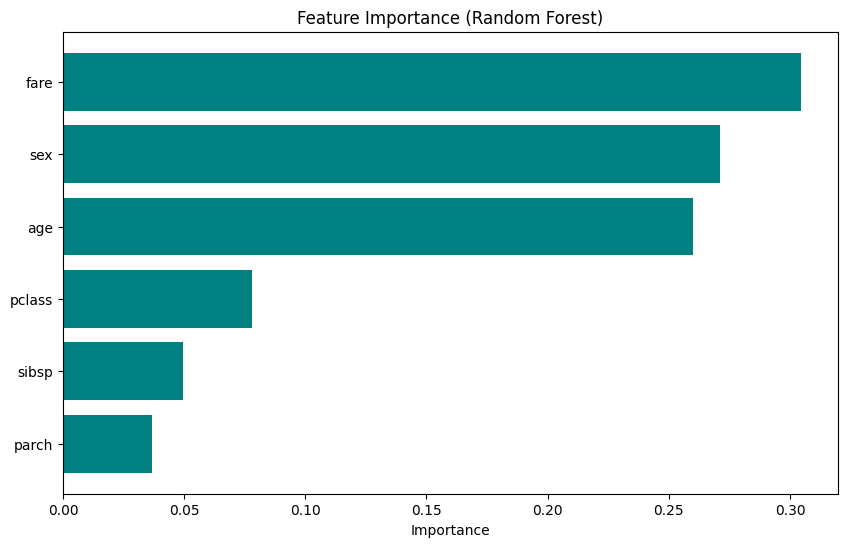


Feature Importance:
  Feature  Importance
5    fare    0.304559
1     sex    0.271255
2     age    0.260020
0  pclass    0.077831
3   sibsp    0.049545
4   parch    0.036790


In [14]:
# Feature importance (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

print("\nFeature Importance:")
print(feature_importance)

## Step 10: Test with Sample Passenger

In [15]:
# Create a sample passenger
# Features: pclass, sex, age, sibsp, parch, fare
sample_passenger = pd.DataFrame({
    'pclass': [3],        # 3rd class
    'sex': [1],           # male
    'age': [22],          # 22 years old
    'sibsp': [1],         # 1 sibling/spouse
    'parch': [0],         # 0 parents/children
    'fare': [7.25]        # fare paid
})

# Predict
lr_pred = lr_model.predict(sample_passenger)[0]
rf_pred = rf_model.predict(sample_passenger)[0]

print("Sample Passenger:")
print(f"  Class: 3rd")
print(f"  Sex: Male")
print(f"  Age: 22")
print(f"  Siblings/Spouse: 1")
print(f"  Parents/Children: 0")
print(f"  Fare: $7.25")
print()
print(f"Logistic Regression Prediction: {'Survived' if lr_pred == 1 else 'Did not survive'}")
print(f"Random Forest Prediction: {'Survived' if rf_pred == 1 else 'Did not survive'}")

Sample Passenger:
  Class: 3rd
  Sex: Male
  Age: 22
  Siblings/Spouse: 1
  Parents/Children: 0
  Fare: $7.25

Logistic Regression Prediction: Did not survive
Random Forest Prediction: Did not survive


## Summary

**What we did:**
1. Loaded the built-in Titanic dataset
2. Explored and visualized the data
3. Cleaned and preprocessed the data
4. Split data into training and testing sets
5. Trained two models: Logistic Regression and Random Forest
6. Made predictions and evaluated accuracy
7. Visualized results with confusion matrices
8. Identified important features
9. Tested with a sample passenger

**Key Features Used:**
- **pclass**: Passenger class (1st, 2nd, 3rd)
- **sex**: Gender (male/female)
- **age**: Age in years
- **sibsp**: Number of siblings/spouses aboard
- **parch**: Number of parents/children aboard
- **fare**: Ticket fare

**Key Metrics:**
- **Accuracy**: Percentage of correct predictions
- **Precision**: How many predicted survivors actually survived
- **Recall**: How many actual survivors were predicted correctly